In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df_file = pd.read_csv("data/recent_filings__all_dates_--2008-22.csv")

df_file.head()

,Name,Case Number,City,States & Territories,Date Filed,Region Assigned,Status,Date Closed,Reason Closed,No. of Eligible Voters,No. of Employees,Certified Representative,Unit Sought
0,Horsepower Electric & Maintenance Corp.,29-RD-309689,Brooklyn,NY,12/30/2022,"Region 29, Brooklyn, New York",Open,NaN,NaN,NaN,140.0,NaN,"Included:\nJourneyman, Apprentices, helpers, m..."
1,Patrick Industries Inc.,10-RC-309674,Decatur,AL,12/30/2022,"Region 10, Atlanta, Georgia",Closed,02/10/2023,Certification of Results,56.0,60.0,NaN,Included: All regular full-time production and...
2,"Schindler of Puerto Rico, L.L.C.",12-RC-309657,Catano,PR,12/30/2022,"Region 12, Tampa, Florida",Closed,01/13/2023,Withdrawal Non-adjusted,NaN,16.0,NaN,Included: All service and repair employees and...
3,United Rentals Pac-Van,25-RC-309624,East Moline,IL,12/29/2022,"Region 25, Indianapolis, Indiana",Closed,01/12/2023,Withdrawal Non-adjusted,NaN,3.0,NaN,Included: All full and part-time truck drivers...
4,Training Rehabilitation & Development Institut...,28-RC-309642,El Paso,TX,12/29/2022,"Region 28, Phoenix, Arizona",Closed,01/23/2023,Withdrawal Non-adjusted,NaN,5.0,NaN,Included: \n\nAll full time and part time lead...


In [3]:
df_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37978 entries, 0 to 37977
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      37978 non-null  object 
 1   Case Number               37978 non-null  object 
 2   City                      37976 non-null  object 
 3   States & Territories      37978 non-null  object 
 4   Date Filed                37978 non-null  object 
 5   Region Assigned           37978 non-null  object 
 6   Status                    37978 non-null  object 
 7   Date Closed               37632 non-null  object 
 8   Reason Closed             37620 non-null  object 
 9   No. of Eligible Voters    23662 non-null  float64
 10  No. of Employees          37705 non-null  float64
 11  Certified Representative  16049 non-null  object 
 12  Unit Sought               36019 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.8+ MB


In [4]:
# change date filed to datetime
df_file['Date Filed'] = pd.to_datetime(df_file['Date Filed'])

In [5]:
# check dtype of 'Date Filed'
df_file['Date Filed'].dtype

dtype('<M8[ns]')

In [6]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37978 entries, 0 to 37977
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      37978 non-null  object        
 1   Case Number               37978 non-null  object        
 2   City                      37976 non-null  object        
 3   States & Territories      37978 non-null  object        
 4   Date Filed                37978 non-null  datetime64[ns]
 5   Region Assigned           37978 non-null  object        
 6   Status                    37978 non-null  object        
 7   Date Closed               37632 non-null  object        
 8   Reason Closed             37620 non-null  object        
 9   No. of Eligible Voters    23662 non-null  float64       
 10  No. of Employees          37705 non-null  float64       
 11  Certified Representative  16049 non-null  object        
 12  Unit Sought       

In [7]:
# create new column for year filed
df_file['year'] = df_file['Date Filed'].dt.year

df_file.head(3)

,Name,Case Number,City,States & Territories,Date Filed,Region Assigned,Status,Date Closed,Reason Closed,No. of Eligible Voters,No. of Employees,Certified Representative,Unit Sought,year
0,Horsepower Electric & Maintenance Corp.,29-RD-309689,Brooklyn,NY,2022-12-30,"Region 29, Brooklyn, New York",Open,NaN,NaN,NaN,140.0,NaN,"Included:\nJourneyman, Apprentices, helpers, m...",2022
1,Patrick Industries Inc.,10-RC-309674,Decatur,AL,2022-12-30,"Region 10, Atlanta, Georgia",Closed,02/10/2023,Certification of Results,56.0,60.0,NaN,Included: All regular full-time production and...,2022
2,"Schindler of Puerto Rico, L.L.C.",12-RC-309657,Catano,PR,2022-12-30,"Region 12, Tampa, Florida",Closed,01/13/2023,Withdrawal Non-adjusted,NaN,16.0,NaN,Included: All service and repair employees and...,2022


In [8]:
# change 'year' to datetime
df_file['year'] = pd.to_datetime(df_file['year'], format='%Y')

In [9]:
# rename 'States & Territories' to 'state'
df_file.rename(columns={'States & Territories': 'state'}, inplace=True)

In [10]:
# transform the data to get the number of cases per year per state  
case_st_yr = df_file.groupby(['year', 'state']).size().reset_index(name='counts')


In [11]:
case_st_yr.head(3)

,year,state,counts
0,2008-01-01,AK,23
1,2008-01-01,AL,32
2,2008-01-01,AR,12


In [12]:
df_file.head(3)

,Name,Case Number,City,state,Date Filed,Region Assigned,Status,Date Closed,Reason Closed,No. of Eligible Voters,No. of Employees,Certified Representative,Unit Sought,year
0,Horsepower Electric & Maintenance Corp.,29-RD-309689,Brooklyn,NY,2022-12-30,"Region 29, Brooklyn, New York",Open,NaN,NaN,NaN,140.0,NaN,"Included:\nJourneyman, Apprentices, helpers, m...",2022-01-01
1,Patrick Industries Inc.,10-RC-309674,Decatur,AL,2022-12-30,"Region 10, Atlanta, Georgia",Closed,02/10/2023,Certification of Results,56.0,60.0,NaN,Included: All regular full-time production and...,2022-01-01
2,"Schindler of Puerto Rico, L.L.C.",12-RC-309657,Catano,PR,2022-12-30,"Region 12, Tampa, Florida",Closed,01/13/2023,Withdrawal Non-adjusted,NaN,16.0,NaN,Included: All service and repair employees and...,2022-01-01


In [13]:
# transform the data to get the number of cases per year per city and state  
case_st_ct_yr = df_file.groupby(['year', 'state', 'City']).size().reset_index(name='counts')

In [14]:
case_st_ct_yr.head(3)

,year,state,City,counts
0,2008-01-01,AK,Anchorage,10
1,2008-01-01,AK,Delta Junction,1
2,2008-01-01,AK,Fairbanks,3


In [15]:
#group cases counts by state
case_st = df_file.groupby(['state']).size().reset_index(name='counts')


In [16]:
case_st.head(10)

,state,counts
0,AE,1
1,AK,203
2,AL,264
3,AR,120
4,AZ,367
5,CA,5027
6,CO,404
7,CT,769
8,DC,699
9,DE,129


In [20]:
# convert state abbreviation to full name
case_st['state_name'] = case_st['state'].map(
{"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota",
 "OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
)
case_st.head(10)

,state,counts,state_name
0,AE,1,NaN
1,AK,203,Alaska
2,AL,264,Alabama
3,AR,120,Arkansas
4,AZ,367,Arizona
5,CA,5027,California
6,CO,404,Colorado
7,CT,769,Connecticut
8,DC,699,NaN
9,DE,129,Delaware


In [21]:
#save case_st to csv
case_st.to_csv('data/cases_filed_st.csv', index=False)

In [17]:
#group cases counts by state
case_st2 = case_st_ct_yr.groupby(['state']).size().reset_index(name='counts')

In [18]:
case_st2.head(10)

,state,counts
0,AE,1
1,AK,103
2,AL,188
3,AR,85
4,AZ,141
5,CA,2242
6,CO,188
7,CT,487
8,DC,19
9,DE,87


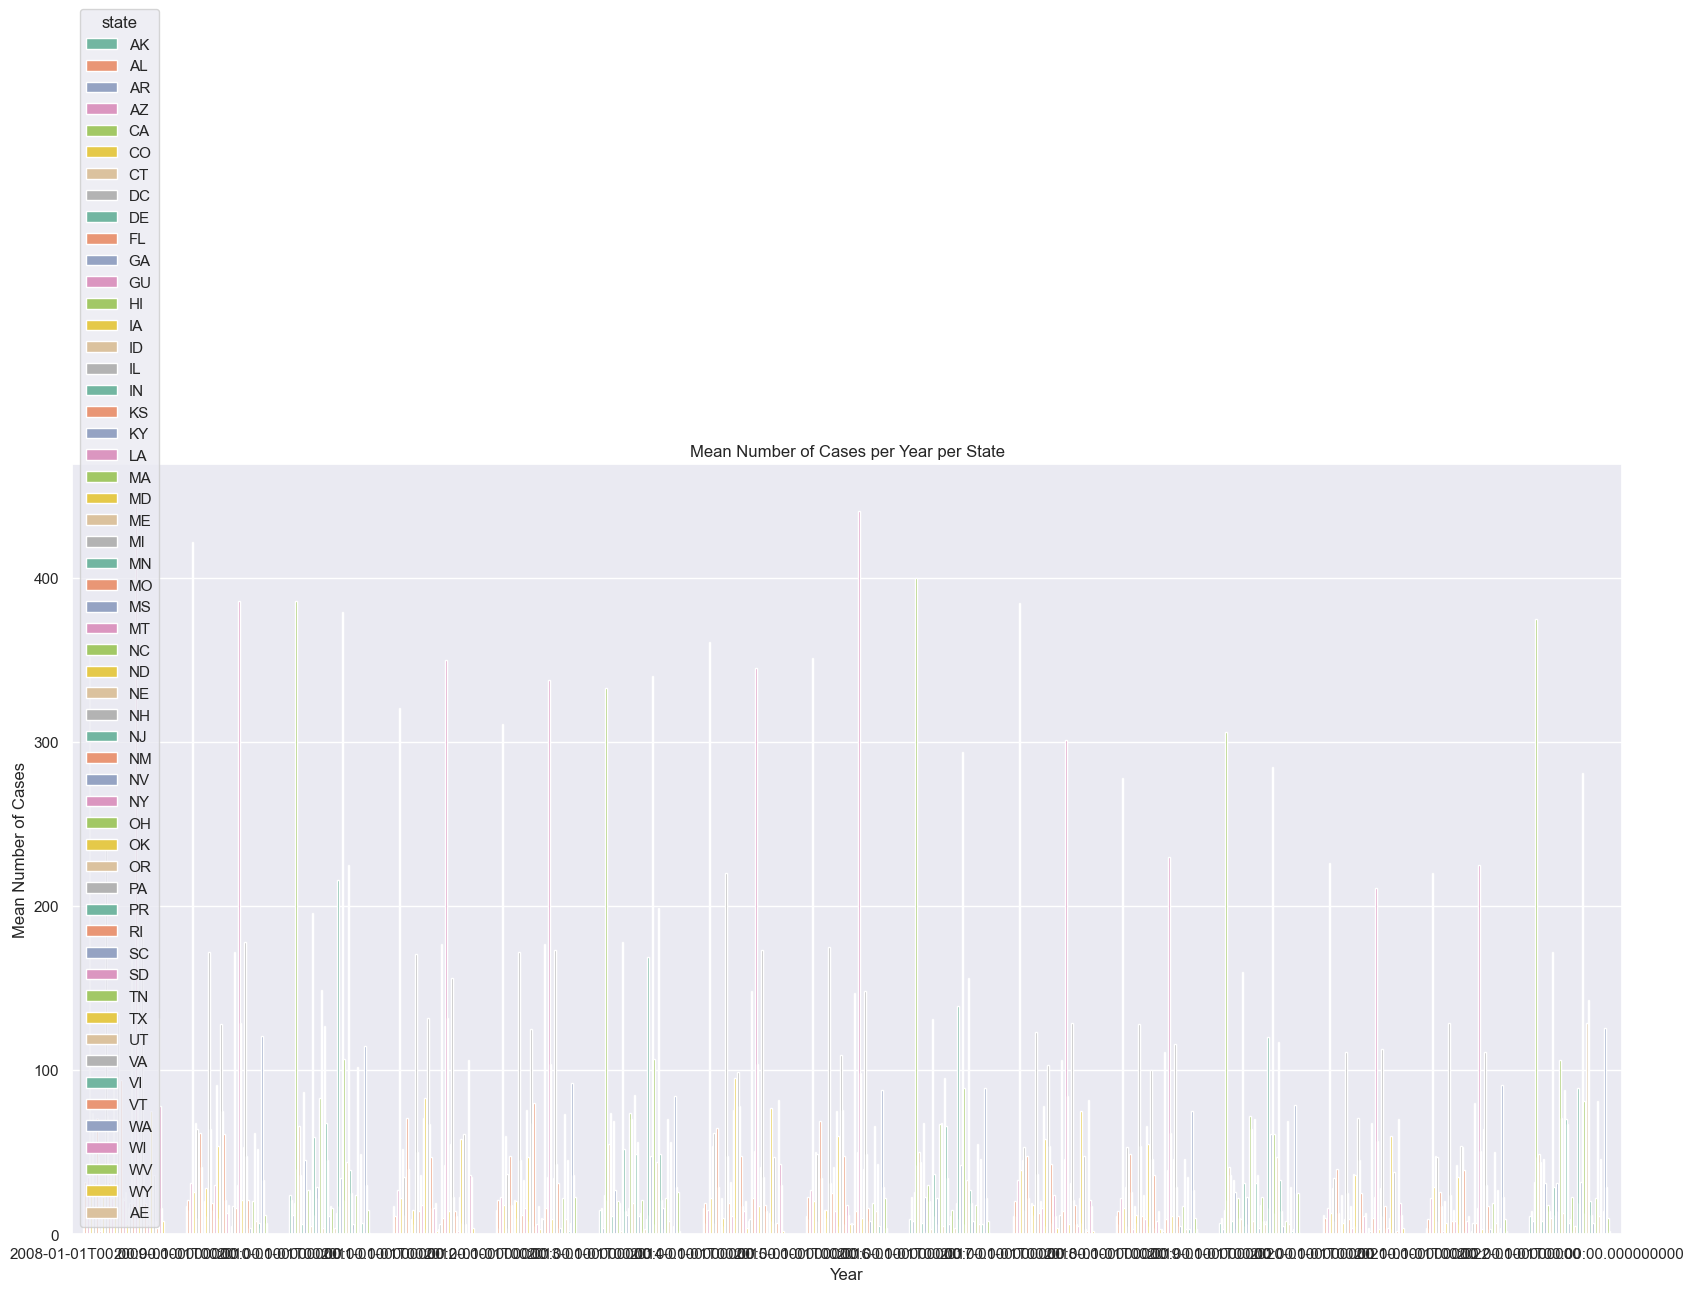

In [16]:
# plot the mean number of cases per year per state bar chart
plt.figure(figsize=(20,10))
sns.barplot(x='year', y='counts', hue='state', data=case_st_yr, palette='Set2')
plt.title('Mean Number of Cases per Year per State')
plt.xlabel('Year')
plt.ylabel('Mean Number of Cases')
plt.show()


In [17]:
# group cases by year
case_yr = df_file.groupby(['year']).size().reset_index(name='counts')
case_yr.head(3)

,year,counts
0,2008-01-01,3339
1,2009-01-01,3017
2,2010-01-01,3126


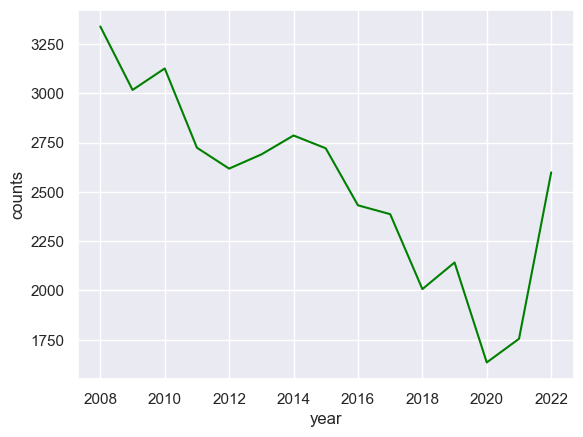

In [18]:
# plot cases filed by year
ax = sns.lineplot(x=case_yr['year'], y=case_yr['counts'], data=case_yr, color='green')

In [19]:
case_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    15 non-null     datetime64[ns]
 1   counts  15 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 368.0 bytes


/var/folders/wc/8hdh58ld0ydc_xf_g99n5yr80000gn/T/ipykernel_3439/391895610.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.displot(case_yr, x='year', y='counts', kind='kde', fill=True, palette='Set2')


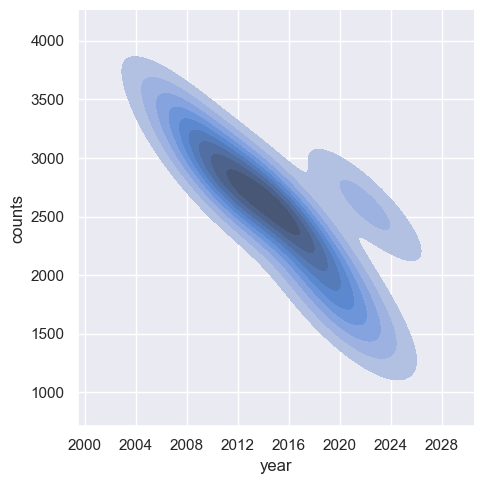

In [20]:
# distribution of cases filed by year
ax = sns.displot(case_yr, x='year', y='counts', kind='kde', fill=True, palette='Set2')

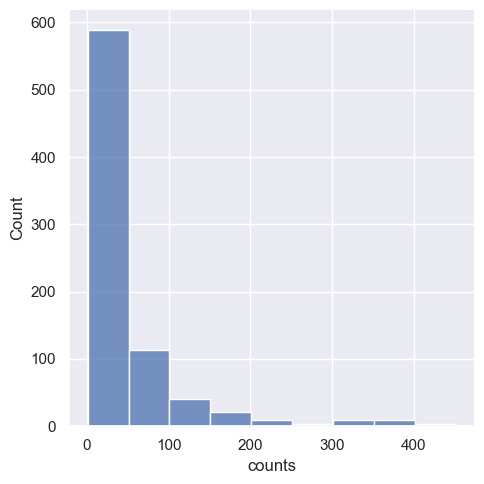

In [21]:
# distribution of cases per state per year
ax = sns.displot(case_st_yr, x="counts", binwidth=50)

In [22]:
# mean of cases per year for each state
case_st_yr['counts'].mean()

47.65119196988708

<AxesSubplot: xlabel='counts', ylabel='state'>

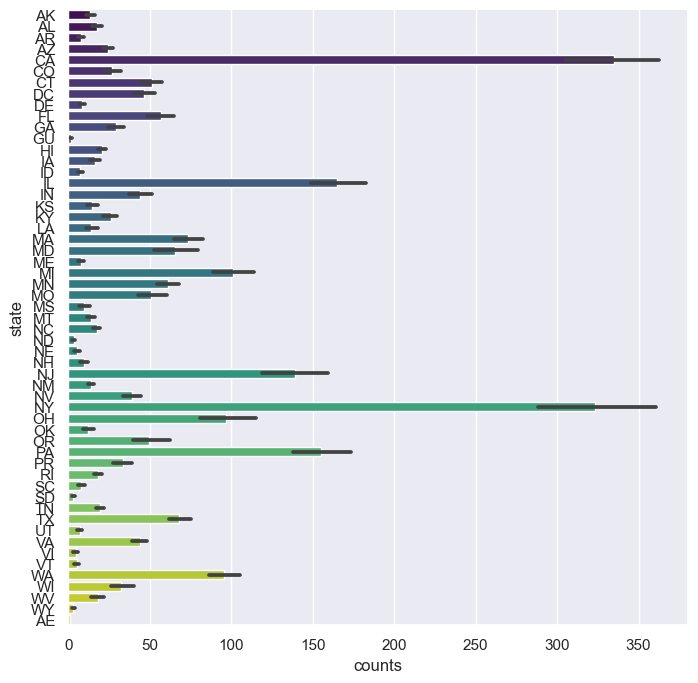

In [23]:
# count of cases filed per state 2008-22
sns.set(rc={"figure.figsize":(8, 8)})
sns.barplot(x="counts", y="state", data=case_st_yr, palette="viridis")

In [24]:
case_st_yr.tail(8)




,year,state,counts
789,2022-01-01,TX,81
790,2022-01-01,UT,11
791,2022-01-01,VA,46
792,2022-01-01,VT,14
793,2022-01-01,WA,126
794,2022-01-01,WI,29
795,2022-01-01,WV,10
796,2022-01-01,WY,2


In [25]:
# group by state a
case_st_mean = case_st_yr.groupby(['state'])['counts'].mean()
st_mean_df= pd.DataFrame(case_st_mean)
st_mean_df['state'] = st_mean_df.index
st_mean_df.head(3)

,counts,state
state,,
AE,1.000000,AE
AK,13.533333,AK
AL,17.600000,AL


In [26]:
# rename counts column to mean_cases
st_mean_df.rename(columns={'counts': 'mean_cases'}, inplace=True)

In [27]:
st_mean_df.head(5)

,mean_cases,state
state,,
AE,1.000000,AE
AK,13.533333,AK
AL,17.600000,AL
AR,8.000000,AR
AZ,24.466667,AZ


In [28]:
# mean of cases filed per state 2008-22
sns.set(rc={"figure.figsize":(8, 10)})
sns.barplot(x="mean cases", y="state", data=st_mean_df, palette="viridis",
    order=st_mean_df.sort_values('mean cases',ascending = False).state)

KeyError: 'mean cases'

In [ ]:
# plot cases filed by year
ax = sns.barplot(x=case_yr['year'], y=case_yr['counts'], data=case_yr, color='green')

In [ ]:
# convert year column to 4 digit year format

case_yr['year'] = case_yr['year'].dt.strftime('%Y')

In [ ]:
case_yr.head(3)

In [ ]:
# plot cases filed by year
ax = sns.barplot(x=case_yr['year'], y=case_yr['counts'], data=case_yr, palette='viridis')

In [29]:
# save case_yr to csv
case_yr.to_csv('data/filings_yr.csv', index=False)